# Let's Look at the percent change from year to year for the top energy source Capabilies 

In [1]:
#import library  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [46]:
data = pd.read_csv("va_electricity_capability.csv")
data.head()

,period,stateId,stateDescription,producertypeid,producerTypeDescription,energysourceid,energySourceDescription,capability,capability-units
0,2024,VA,Virginia,EU,Electric Utilities,ALL,All,21256.2,megawatts
1,2024,VA,Virginia,EU,Electric Utilities,BAT,Battery,60.0,megawatts
2,2024,VA,Virginia,EU,Electric Utilities,COL,Coal,1487.1,megawatts
3,2024,VA,Virginia,EU,Electric Utilities,HPS,Pumped Storage,3253.1,megawatts
4,2024,VA,Virginia,EU,Electric Utilities,HYC,Hydroelectric,821.6,megawatts


In [47]:
mask = ['All','Natural Gas - CC','Natural Gas - GT', 'Natural Gas - IC','Natural Gas - ST','Petroleum - IC','Solar - PV','Petroleum - GT','Petroleum - ST']

pc_data = data[(data["producertypeid"] == "TOT") & (~data["energySourceDescription"].isin(mask))].copy()

# Sort for correct pct_change behavior
pc_data = pc_data.sort_values(["energySourceDescription", "period"])

# Compute YoY percent change
pc_data["pct_change"] = (pc_data.groupby("energySourceDescription")["capability"].pct_change() * 100)

# Fix inf error 
pc_data["pct_change"].replace([np.inf, -np.inf], np.nan, inplace=True)

pc_data_filled = pc_data.fillna(0)

pc_data_filled.head()

,period,stateId,stateDescription,producertypeid,producerTypeDescription,energysourceid,energySourceDescription,capability,capability-units,pct_change
140,2022,VA,Virginia,TOT,All sectors,BAT,Battery,10.5,megawatts,0.000000
87,2023,VA,Virginia,TOT,All sectors,BAT,Battery,70.5,megawatts,571.428571
35,2024,VA,Virginia,TOT,All sectors,BAT,Battery,70.5,megawatts,0.000000
1246,1990,VA,Virginia,TOT,All sectors,COL,Coal,4598.0,megawatts,0.000000
1220,1991,VA,Virginia,TOT,All sectors,COL,Coal,4672.0,megawatts,1.609395


**Lets make a heatmap for the  YoY percent changes normalized by year and then by Energy Source**

In [48]:
pc_grouped = pc_data_filled.groupby(["period", "energySourceDescription"])['pct_change'].sum().unstack().fillna(0)

In [49]:
# Normalize column-wise or by energy Source 
pc_grouped.style.background_gradient(cmap='PiYG', axis=0)

energySourceDescription,Battery,Coal,Hydroelectric,Natural Gas,Nuclear,Other,Other Biomass,Petroleum,Pumped Storage,Solar,Wind,Wood
period,,,,,,,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,0.000000,1.609395,0.514139,26.021180,0.000000,0.000000,2.040816,5.813953,0.000000,0.000000,0.000000,2.647059
1992,0.000000,9.803082,-0.127877,117.286915,-0.975754,314.516129,2.000000,-5.254121,0.000000,0.000000,0.000000,0.000000
1993,0.000000,-0.370370,0.768246,18.176796,0.000000,0.000000,3.921569,1.449801,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,-0.127065,3.085554,0.000000,0.000000,2.515723,-3.358342,0.000000,0.000000,0.000000,24.068768
1995,0.000000,24.750538,-2.926209,26.984127,1.283965,0.000000,0.000000,-48.613678,0.000000,0.000000,0.000000,-7.852194
1996,0.000000,-2.478043,-0.131062,-4.642857,0.000000,-49.805447,33.742331,58.992806,0.000000,0.000000,0.000000,7.518797
1997,0.000000,0.498553,-0.131234,-16.629213,0.000000,0.000000,0.000000,36.470588,0.000000,0.000000,0.000000,-7.692308
1998,0.000000,-0.448072,0.394218,32.749326,0.000000,59.689922,-2.752294,-26.027851,0.000000,0.000000,0.000000,7.070707


In [50]:
# Normalize row-wise or by year 
pc_grouped.style.background_gradient(cmap='PiYG', axis=1)

energySourceDescription,Battery,Coal,Hydroelectric,Natural Gas,Nuclear,Other,Other Biomass,Petroleum,Pumped Storage,Solar,Wind,Wood
period,,,,,,,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,0.000000,1.609395,0.514139,26.021180,0.000000,0.000000,2.040816,5.813953,0.000000,0.000000,0.000000,2.647059
1992,0.000000,9.803082,-0.127877,117.286915,-0.975754,314.516129,2.000000,-5.254121,0.000000,0.000000,0.000000,0.000000
1993,0.000000,-0.370370,0.768246,18.176796,0.000000,0.000000,3.921569,1.449801,0.000000,0.000000,0.000000,0.000000
1994,0.000000,0.000000,-0.127065,3.085554,0.000000,0.000000,2.515723,-3.358342,0.000000,0.000000,0.000000,24.068768
1995,0.000000,24.750538,-2.926209,26.984127,1.283965,0.000000,0.000000,-48.613678,0.000000,0.000000,0.000000,-7.852194
1996,0.000000,-2.478043,-0.131062,-4.642857,0.000000,-49.805447,33.742331,58.992806,0.000000,0.000000,0.000000,7.518797
1997,0.000000,0.498553,-0.131234,-16.629213,0.000000,0.000000,0.000000,36.470588,0.000000,0.000000,0.000000,-7.692308
1998,0.000000,-0.448072,0.394218,32.749326,0.000000,59.689922,-2.752294,-26.027851,0.000000,0.000000,0.000000,7.070707


**Lets look at the YoY percent change for Natural Gas**
- I'm looking at this more closely because after extensive reading, it seems like most in NOVA rely on Natural gas electricity generation. 

In [66]:
ngpc_data = pc_data_filled[pc_data_filled['energySourceDescription'] == 'Natural Gas']
ngpc_data.head(20)

,period,stateId,stateDescription,producertypeid,producerTypeDescription,energysourceid,energySourceDescription,capability,capability-units,pct_change
1249,1990,VA,Virginia,TOT,All sectors,NG,Natural Gas,661.0,megawatts,0.000000
1223,1991,VA,Virginia,TOT,All sectors,NG,Natural Gas,833.0,megawatts,26.021180
1196,1992,VA,Virginia,TOT,All sectors,NG,Natural Gas,1810.0,megawatts,117.286915
1170,1993,VA,Virginia,TOT,All sectors,NG,Natural Gas,2139.0,megawatts,18.176796
1145,1994,VA,Virginia,TOT,All sectors,NG,Natural Gas,2205.0,megawatts,3.085554
1120,1995,VA,Virginia,TOT,All sectors,NG,Natural Gas,2800.0,megawatts,26.984127
1094,1996,VA,Virginia,TOT,All sectors,NG,Natural Gas,2670.0,megawatts,-4.642857
1067,1997,VA,Virginia,TOT,All sectors,NG,Natural Gas,2226.0,megawatts,-16.629213
1040,1998,VA,Virginia,TOT,All sectors,NG,Natural Gas,2955.0,megawatts,32.749326
1013,1999,VA,Virginia,TOT,All sectors,NG,Natural Gas,2955.0,megawatts,0.000000


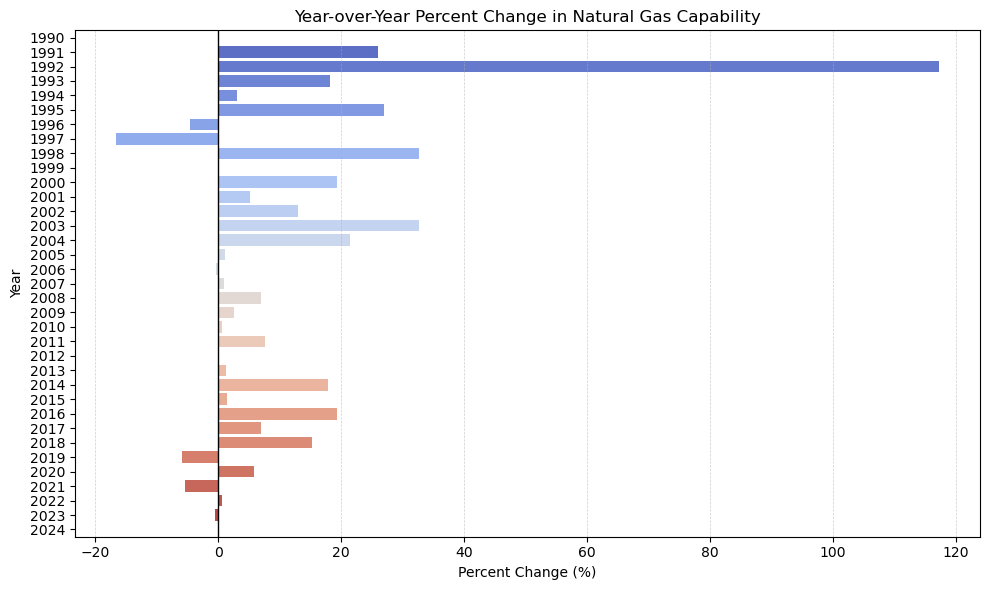

In [53]:
plt.figure(figsize=(10, 6))

# Diverging bar chart
sns.barplot(ngpc_data, x="pct_change", y="period", orient="h", palette="coolwarm")

# Add a vertical line at zero
plt.axvline(0, color='black', linewidth=1)

# Labels & title
plt.title("Year-over-Year Percent Change in Natural Gas Capability")
plt.xlabel("Percent Change (%)")
plt.ylabel("Year")

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)

Year-over-year changes in Virginia’s natural gas capability from 2014–2020 show a sustained period of strong growth, reflecting the rapid build-out of Northern Virginia data centers. As hyperscale campuses expanded and new facilities came online, utilities increased natural gas capacity to meet the steep rise in electricity demand, with the largest increases occurring between 2015 and 2018. However, you may look at the graph and see a huge percentage change in 1992. Well, I'm here to explain that. 

The unusually high percent change in 1992 likely reflects structural changes in the natural-gas industry. There was deregulation, pipeline expansion, and widespread switching to gas rather than a straightforward incremental increase in demand or capacity. This makes 1992 distinct from the later 2014–2020 growth trend, which is more directly tied to increased electricity demand (data centers).

**Lets look at some other YoY %change for specific energy sources**

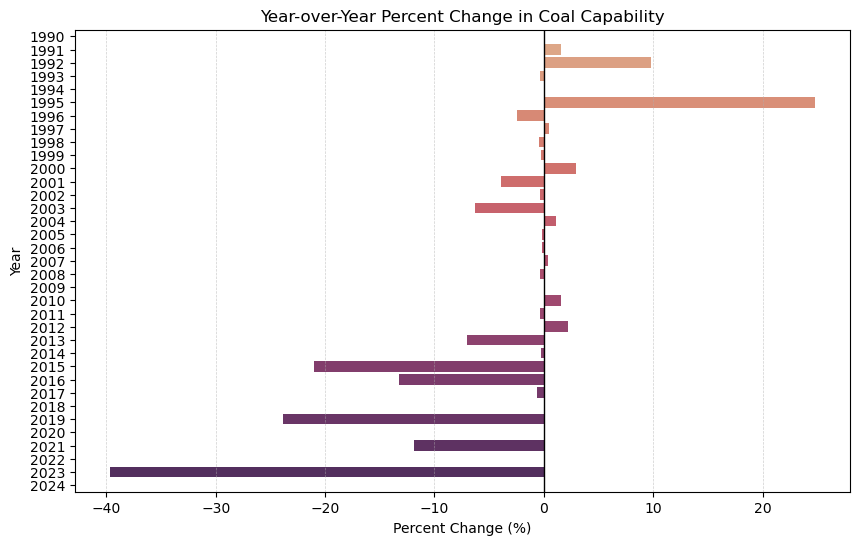

In [63]:
coalpc_data = pc_data_filled[pc_data_filled['energySourceDescription'] == 'Coal']

plt.figure(figsize=(10, 6))

# Diverging bar chart
sns.barplot(coalpc_data, x="pct_change", y="period", orient="h", palette="flare")

# Add a vertical line at zero
plt.axvline(0, color='black', linewidth=1)

# Labels & title
plt.title("Year-over-Year Percent Change in Coal Capability")
plt.xlabel("Percent Change (%)")
plt.ylabel("Year")

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)

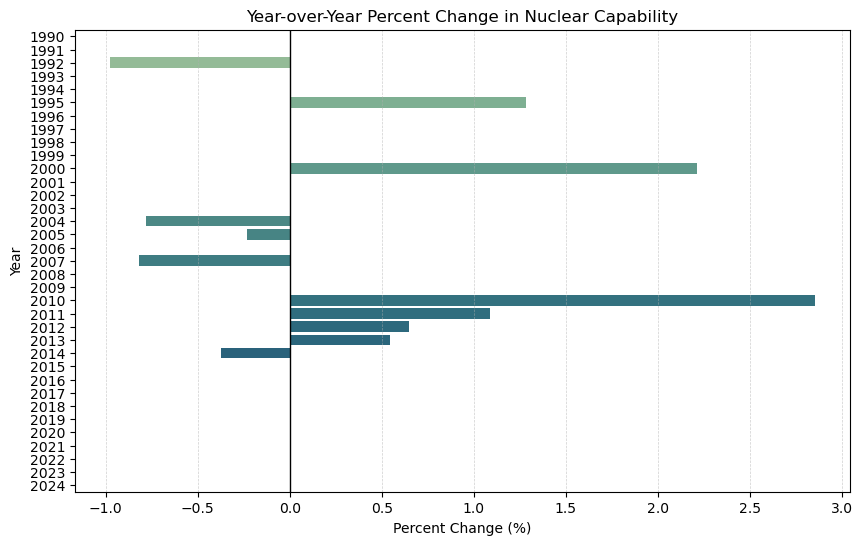

In [64]:
nucpc_data = pc_data_filled[pc_data_filled['energySourceDescription'] == 'Nuclear']

plt.figure(figsize=(10, 6))

# Diverging bar chart
sns.barplot(nucpc_data, x="pct_change", y="period", orient="h", palette="crest")

# Add a vertical line at zero
plt.axvline(0, color='black', linewidth=1)

# Labels & title
plt.title("Year-over-Year Percent Change in Nuclear Capability")
plt.xlabel("Percent Change (%)")
plt.ylabel("Year")

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)

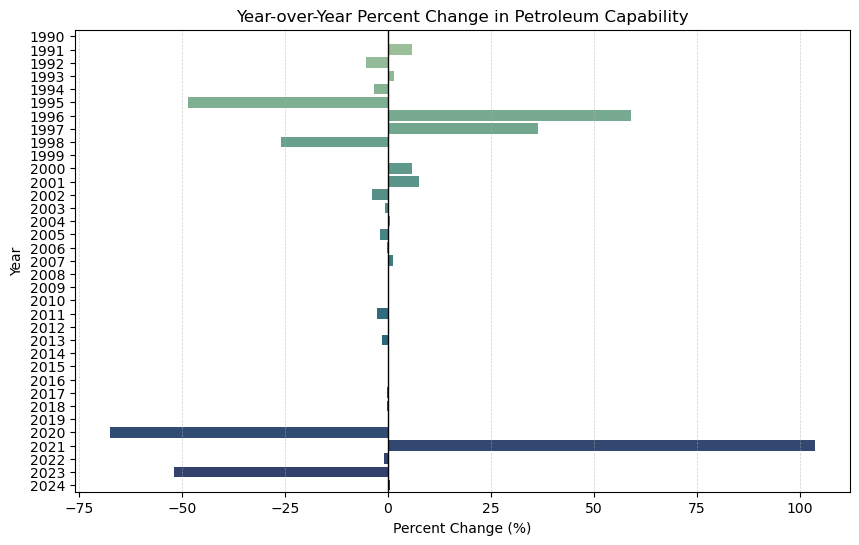

In [65]:
petpc_data = pc_data_filled[pc_data_filled['energySourceDescription'] == 'Petroleum']

plt.figure(figsize=(10, 6))

# Diverging bar chart
sns.barplot(petpc_data, x="pct_change", y="period", orient="h", palette="crest")

# Add a vertical line at zero
plt.axvline(0, color='black', linewidth=1)

# Labels & title
plt.title("Year-over-Year Percent Change in Petroleum Capability")
plt.xlabel("Percent Change (%)")
plt.ylabel("Year")

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)